In [72]:
import numpy as np
import pandas as pd
import math
import os
import cv2
import matplotlib.pyplot as plt

In [73]:
IMAGE_DIM=50

In [74]:
def read_image(path):
    img = cv2.imread('a00000.png', cv2.IMREAD_GRAYSCALE)
    # Resizing the image
    img = cv2.resize(img,(IMAGE_DIM, IMAGE_DIM))
    # reshpaing the image
    img = img.reshape(IMAGE_DIM, IMAGE_DIM, 1) # 1 for grayscale
    # Displaying the image
    # plt.imshow(img, cmap='gray')
    # plt.show()
    # print(img.shape)
    return img

In [75]:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files
class CustomImageDataset:
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 3] # 3 is the column index of the label
        # if self.transform:
        #     image = self.transform(image)
        # if self.target_transform:
        #     label = self.target_transform(label)
        return image, label

In [76]:
import numpy as np
import os
import cv2
import pandas as pd

class CustomDataLoader:
    def __init__(self, dataset, batch_size=32, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.current_idx = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_idx >= len(self.dataset):
            raise StopIteration
        
        # Get the next batch. If the batch size is larger than the number of
        # remaining elements, just return the remaining elements.
        if self.current_idx + self.batch_size > len(self.dataset):
            batch = [self.dataset[i] for i in range(self.current_idx, len(self.dataset))]
            self.current_idx = len(self.dataset)
        else:
            batch = [self.dataset[i] for i in range(self.current_idx, self.current_idx + self.batch_size)]
            self.current_idx += self.batch_size
        

        if self.shuffle:
            np.random.shuffle(batch)

        images, labels = zip(*batch)
        images = np.stack(images)
        labels = np.stack(labels)

        return images, labels

annotations_file = "./NumtaDB/training-a.csv"
img_dir = "./NumtaDB/training-a"
dataset = CustomImageDataset(annotations_file, img_dir)
dataloader = CustomDataLoader(dataset, batch_size=64, shuffle=False)

# for images, labels in dataloader:
    # print(images.shape, labels.shape)

(180, 180)


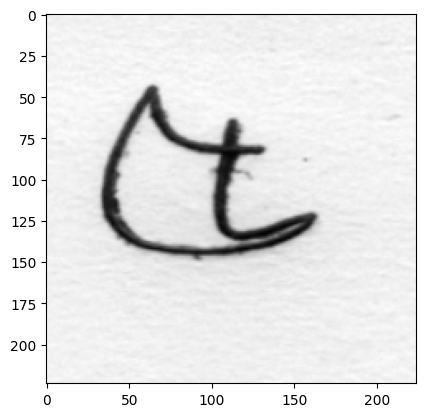

(224, 224)


In [77]:
img = cv2.imread('a00000.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
# Resizing the image
img = cv2.resize(img,(IMAGE_DIM, IMAGE_DIM))
# Displaying the image
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)